# Random noise image encoding
short demo of AE. 
no training, just displaying input and output of AE.

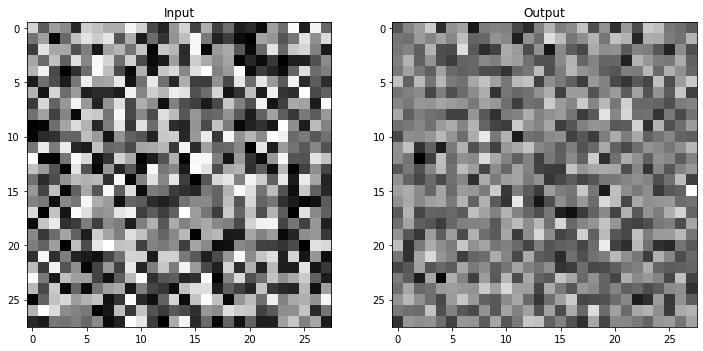

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Define the autoencoder model
class Autoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(Autoencoder, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, latent_dim),
            nn.ReLU()
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        latent = self.encoder(x)
        output = self.decoder(latent)
        return output
    
# Define the input data and the model
input_dim = 784
latent_dim = 32

model = Autoencoder(input_dim, latent_dim)

# Generate some random input data
x = torch.rand((1, input_dim))

# Compute the output of the model
output = model(x)

# Reshape the input and output tensors for plotting
input_img = x.reshape((28, 28))
output_img = output.detach().numpy().reshape((28, 28))

# Plot the input and output images side by side
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
ax[0].imshow(input_img, cmap='gray')
ax[0].set_title('Input')
ax[1].imshow(output_img, cmap='gray')
ax[1].set_title('Output')
plt.show()


# Use audio sample 
Train AE. Preview input and output audios

Epoch [1/100], Loss: 0.0921
Epoch [2/100], Loss: 0.0828
Epoch [3/100], Loss: 0.0739
Epoch [4/100], Loss: 0.0653
Epoch [5/100], Loss: 0.0567
Epoch [6/100], Loss: 0.0483
Epoch [7/100], Loss: 0.0406
Epoch [8/100], Loss: 0.0336
Epoch [9/100], Loss: 0.0281
Epoch [10/100], Loss: 0.0238
Epoch [11/100], Loss: 0.0205
Epoch [12/100], Loss: 0.0186
Epoch [13/100], Loss: 0.0180
Epoch [14/100], Loss: 0.0180
Epoch [15/100], Loss: 0.0178
Epoch [16/100], Loss: 0.0170
Epoch [17/100], Loss: 0.0160
Epoch [18/100], Loss: 0.0149
Epoch [19/100], Loss: 0.0141
Epoch [20/100], Loss: 0.0137
Epoch [21/100], Loss: 0.0135
Epoch [22/100], Loss: 0.0136
Epoch [23/100], Loss: 0.0137
Epoch [24/100], Loss: 0.0138
Epoch [25/100], Loss: 0.0139
Epoch [26/100], Loss: 0.0139
Epoch [27/100], Loss: 0.0138
Epoch [28/100], Loss: 0.0137
Epoch [29/100], Loss: 0.0135
Epoch [30/100], Loss: 0.0134
Epoch [31/100], Loss: 0.0132
Epoch [32/100], Loss: 0.0131
Epoch [33/100], Loss: 0.0130
Epoch [34/100], Loss: 0.0129
Epoch [35/100], Loss: 0

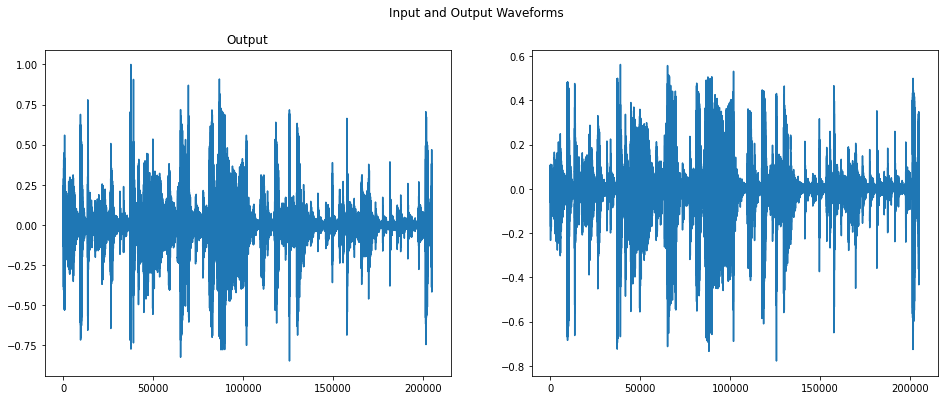

Input audio:


Output audio:


In [2]:
import torch
import torch.nn as nn
import torchaudio
import torch.nn.functional as F
import matplotlib.pyplot as plt
import time as time

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
        )
        
        self.decoder = nn.Sequential(
            nn.ConvTranspose1d(in_channels=128, out_channels=64, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose1d(in_channels=64, out_channels=32, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose1d(in_channels=32, out_channels=16, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose1d(in_channels=16, out_channels=1, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

## Load and preprocess the audio waveform ##
# try to load small smaple first
sample = 'insert_path_sample.wav'       ## insert full sample path here
waveform, sample_rate = torchaudio.load(sample)

# Resample the audio to 16 kHz and convert to mono
transform = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=16000)
waveform = transform(waveform)
waveform = torch.mean(waveform, dim=0, keepdim=True)

# Normalize the waveform to be between -1 and 1
waveform /= torch.max(torch.abs(waveform))

# Create an instance of the autoencoder
autoencoder = Autoencoder()

# Set the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=0.001)

import torch.nn.functional as F

# reshape the waveform to be (batch_size, channels, time)
output = torch.empty_like(waveform)
if waveform.shape[1] > output.shape[1]:
    output = F.pad(output, (0, waveform.shape[1] - output.shape[1]), mode='constant', value=0)
else:
    waveform = F.pad(waveform, (0, output.shape[1] - waveform.shape[1]), mode='constant', value=0)
    
# Train the autoencoder
start = time.time()
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    output = autoencoder(waveform)
    if waveform.shape[1] > output.shape[1]:
        output = F.pad(output, (0, waveform.shape[1] - output.shape[1]), mode='constant', value=0)
    else:
        waveform = F.pad(waveform, (0, output.shape[1] - waveform.shape[1]), mode='constant', value=0)
    loss = criterion(output, waveform)


    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    
end = time.time()
print(f'Training time: {end - start:.2f} seconds')
# Save the input and output audio files
input_audio = waveform.squeeze().numpy()
output_audio = output.squeeze().detach().numpy()
# Reshape to 2D tensor
input_audio = input_audio.reshape(1, -1)
output_audio = output_audio.reshape(1, -1)

torchaudio.save('input_audio.wav', torch.from_numpy(input_audio), 16000)
torchaudio.save('output_audio.wav', torch.from_numpy(output_audio), 16000)

# Plot the input and output waveforms side by side
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Input and Output Waveforms')
axs[0].plot(waveform[0].numpy())
axs[0].set_title('Input')
axs[1].plot(output[0].detach().numpy())
axs[0].set_title('Output')
plt.show()

# Preview the input and output audio files
from IPython.display import Audio
print('Input audio:')
display(Audio('input_audio.wav'))
print('Output audio:')
display(Audio('output_audio.wav'))


## VAE

Train simple VAE with linear layers.

Preview input and output audio.

/var/folders/3n/8zdy8bw105dfs66tqtrb_ql80000gn/T/ipykernel_5887/3981922465.py:79: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  waveform_tensor = torch.tensor(waveform)


Epoch 1, Loss=18357.2480
Epoch 2, Loss=128643.4375
Epoch 3, Loss=105015.6797
Epoch 4, Loss=67742.0859
Epoch 5, Loss=48167.2969
Epoch 6, Loss=31232.8047
Epoch 7, Loss=17328.7402
Epoch 8, Loss=12677.7920
Epoch 9, Loss=11695.8760
Epoch 10, Loss=18426.1211
Epoch 11, Loss=14269.4600
Epoch 12, Loss=7174.9399
Epoch 13, Loss=5453.6050
Epoch 14, Loss=6042.4341
Epoch 15, Loss=5895.4961
Epoch 16, Loss=7754.3545
Epoch 17, Loss=5917.5005
Epoch 18, Loss=4023.1018
Epoch 19, Loss=2522.8940
Epoch 20, Loss=2229.4641
Epoch 21, Loss=2769.0320
Epoch 22, Loss=3970.2549
Epoch 23, Loss=3770.6887
Epoch 24, Loss=3630.6978
Epoch 25, Loss=3134.4397
Epoch 26, Loss=2046.7716
Epoch 27, Loss=1528.5304
Epoch 28, Loss=1274.9401
Epoch 29, Loss=1237.1177
Epoch 30, Loss=1752.1393
Epoch 31, Loss=1636.9900
Epoch 32, Loss=1195.2982
Epoch 33, Loss=1985.7491
Epoch 34, Loss=2628.1389
Epoch 35, Loss=1350.9037
Epoch 36, Loss=2173.9268
Epoch 37, Loss=1675.9874
Epoch 38, Loss=1385.7112
Epoch 39, Loss=1225.7354
Epoch 40, Loss=1189.2

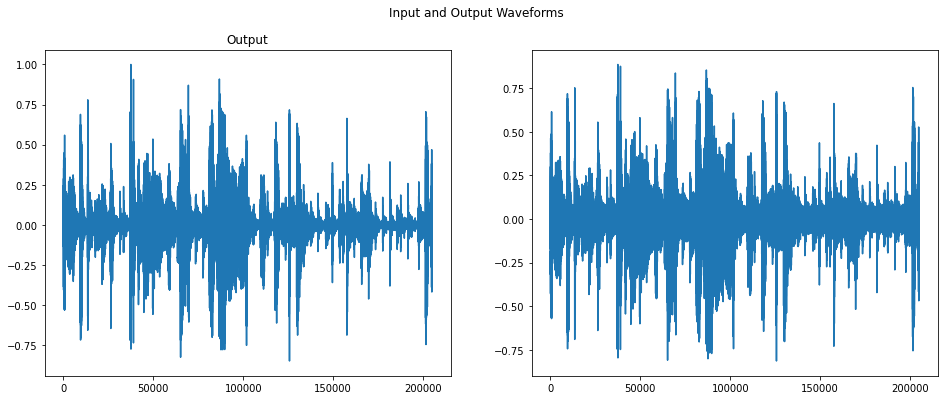

Input audio:


Output audio:


In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torchaudio
from torchaudio.transforms import Resample
import time as time
import matplotlib.pyplot as plt
import os

## Load and preprocess the audio waveform ##
# try to load small smaple first
sample = 'insert_path_sample.wav'       ## insert sample path here
waveform, sample_rate = torchaudio.load(sample)

# Resample the audio to 16 kHz and convert to mono
transform = Resample(orig_freq=sample_rate, new_freq=16000)      ## try different sample rates
waveform = transform(waveform)
waveform = torch.mean(waveform, dim=0, keepdim=True)

# Normalize the waveform to be between -1 and 1
waveform /= torch.max(torch.abs(waveform))

size = waveform.size()[1]

latent_size = 20        ## try different latent sizes

# Define the VAE model architecture
class VAE(nn.Module):
    def __init__(self, latent_size=latent_size):
        super(VAE, self).__init__()
        
        # Encoder layers
        self.fc1 = nn.Linear(size, 512)
        self.fc2_mean = nn.Linear(512, latent_size)
        self.fc2_logvar = nn.Linear(512, latent_size)
        
        # Decoder layers
        self.fc3 = nn.Linear(latent_size, 512)
        self.fc4 = nn.Linear(512, size)
        
    def encode(self, x):
        x = F.relu(self.fc1(x))
        mean = self.fc2_mean(x)
        logvar = self.fc2_logvar(x)
        return mean, logvar
    
    def reparameterize(self, mean, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        z = mean + eps * std
        return z
    
    def decode(self, z):
        z = F.relu(self.fc3(z))
        x = torch.tanh(self.fc4(z))
        return x
    
    def forward(self, x):
        mean, logvar = self.encode(x.view(-1, size))
        z = self.reparameterize(mean, logvar)
        x_recon = self.decode(z)
        return x_recon, mean, logvar

# Define the loss function
def vae_loss(x_recon, x, mean, logvar):
    recon_loss = F.mse_loss(x_recon, x.view(-1, size), reduction='sum')
    kl_loss = -0.5 * torch.sum(1 + logvar - mean.pow(2) - logvar.exp())
    return recon_loss + kl_loss


# Create the VAE model and optimizer
vae = VAE()
learning_rate = 0.0008        # try different learning rates       
optimizer = optim.Adam(vae.parameters(), lr=learning_rate)       

# Convert the audio waveform to a PyTorch tensor
waveform_tensor = torch.tensor(waveform)

# Create a PyTorch DataLoader for the audio data
dataset = TensorDataset(waveform_tensor)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

num_epochs = 100
start_time = time.time()

for epoch in range(num_epochs):
    total_loss = 0
    for batch in dataloader:
        optimizer.zero_grad()
        x = batch[0]
        x_recon, mean, logvar = vae(x)
        loss = vae_loss(x_recon, x, mean, logvar)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print("Epoch %d, Loss=%.4f" % (epoch+1, total_loss))

# Save the trained model
model_name = 'simple'
torch.save(vae.state_dict(), f'vae_model_{model_name}.pt')
end_time = time.time()
print('Training Time: {:.2f} s'.format(end_time - start_time))

# Save the input and output audio files
input_audio = waveform.squeeze().numpy()
# Reshape to 2D tensor
input_audio = input_audio.reshape(1, -1)
# Save the output audio file
output_audio, _, _ = vae(waveform_tensor)
output_audio = output_audio.squeeze().detach().numpy()
# Reshape to 2D tensor
output_audio = output_audio.reshape(1, -1)

torchaudio.save('input_audio.wav', torch.from_numpy(input_audio), 16000)
torchaudio.save('output_audio.wav', torch.from_numpy(output_audio), 16000)

# Plot the input and output waveforms side by side
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Input and Output Waveforms')
axs[0].plot(waveform[0].numpy())
axs[0].set_title('Input')
axs[1].plot(x_recon.squeeze().detach().numpy())
axs[0].set_title('Output')
plt.show()

# Preview the input and output audio files
from IPython.display import Audio
print('Input audio:')
display(Audio('input_audio.wav'))
print('Output audio:')
display(Audio('output_audio.wav'))


In [6]:
'''generate new sounds by sampling from the latent space'''

# Load the saved model
model_name ="simple"
vae = VAE()
vae.load_state_dict(torch.load(f'vae_model_{model_name}.pt'))

latent_size = 20            ## make sure latent size is the same as the one used for training
# Generate new audio waveforms
num_samples = 3

for i in range(num_samples):
    # Generate a random latent vector
    z = torch.randn(1, latent_size)
    
    # Decode the latent vector to generate a new audio sample
    output_audio = vae.decode(z)
    
    # Save the output audio file
    print(f'Output audio {i}:')
    display(Audio('output_audio.wav'))


Output audio 0:


Output audio 1:


Output audio 2:
